#### Measurement Framework Library
# MFLib API Examples: Prepare a Slice

Add the Measurement Node and Measurement Network while creating new slice.  
This notebook shows the process of creating a 3 node experiment with the needed Measurement Node and Measurement Network.  
The process of creating the sice is the same as creating any slice but after the topology has been set, MFLib needs to add the extra node and network before the slice is submitted. 

## Install MFLIB

MFLib is part of the fabrictestbed-extensions repository. MFLib will be installed when the fabrictestbed-extensions is installed.
However, the latest release may not contain the MFLib code that is compatible with this notebook so you may need to the a specific MFLib branch.
See the [fabricttestbed-extensions install notebook.](./fabrictestbed_extensions_install.ipynb)

## Check Installed Version

In [ ]:
%run ./fabrictestbed_extensions_version_check.ipynb

## General Imports

In [ ]:
import os
import json
import traceback

## Import MFLib
If you have trouble importing mflib it may be because:
* After you do the install, you will have to restart the notebook kernel before the importing of MFLib will work.
* When your Jupyter Hub server container is reloaded, the above install will may be removed. If you log out or have to restart the server you will get an import error when trying to import MFLib.
See [Install MFLib](./mflib_install.ipynb)


In [ ]:
import mflib 
print(f"MFLib version  {mflib.__VERSION__} " )

from mflib.mflib import MFLib

## Setup Experiment Slice

### Import fablib & set slice information

In [ ]:
%%time
from fabrictestbed_extensions.fablib.fablib import fablib

slice_name = "MyMonitoredSlice"
[site] = fablib.get_random_sites(avoid=["FIU", "NCSA", "GPN", "CLEM", "UCSD", "MASS"])
node1_name = 'Node1'
node2_name = 'Node2'
node3_name = 'Node3'
network_name='net1'
node1_nic_name = 'nic1'
node2_nic_name = 'nic2'
node3_nic_name = 'nic3'
image = 'default_ubuntu_20'
image_type = 'qcow2'
cores = 2
ram = 8
disk = 10
print(f"Using slice {slice_name} at site {site}")

### Create Experiment Topology

In [ ]:
try:
    print("Setting up slice...")
    #Create Slice
    slice = fablib.new_slice(name=slice_name)

    # Node1
    node1 = slice.add_node(name=node1_name, site=site)
    node1.set_capacities(cores=cores, ram=ram, disk=disk)
    node1.set_image(image)
    iface1 = node1.add_component(model='NIC_Basic', name=node1_nic_name).get_interfaces()[0]
   
    # Node2
    node2 = slice.add_node(name=node2_name, site=site)
    node2.set_capacities(cores=cores, ram=ram, disk=disk)
    node2.set_image(image)
    iface2 = node2.add_component(model='NIC_Basic', name=node2_nic_name).get_interfaces()[0]
    
    # Node3
    node3 = slice.add_node(name=node3_name, site=site)
    node3.set_capacities(cores=cores, ram=ram, disk=disk)
    node3.set_image(image)
    iface3 = node3.add_component(model='NIC_Basic', name=node3_nic_name).get_interfaces()[0]
        
    
    # Network
    net1 = slice.add_l2network(name=network_name, interfaces=[iface1, iface2, iface3])
    
    print("Slice setup done.")
    
except Exception as e:
    print(f"Slice Fail: {e}")
    traceback.print_exc()

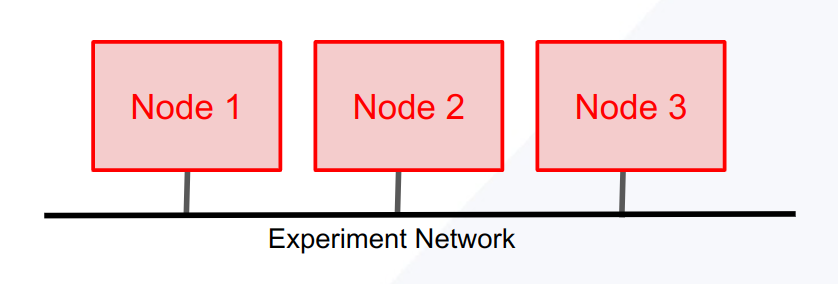

### Add measurement node to slice topology.
To add the Measurement Node and Measurement Network use the static method mflib.addMeasNode(slice), where slice is the fablib slice object.

In [ ]:
# Add measurement node to topology using static method.
mflib.addMeasNode(slice)
print("Done")

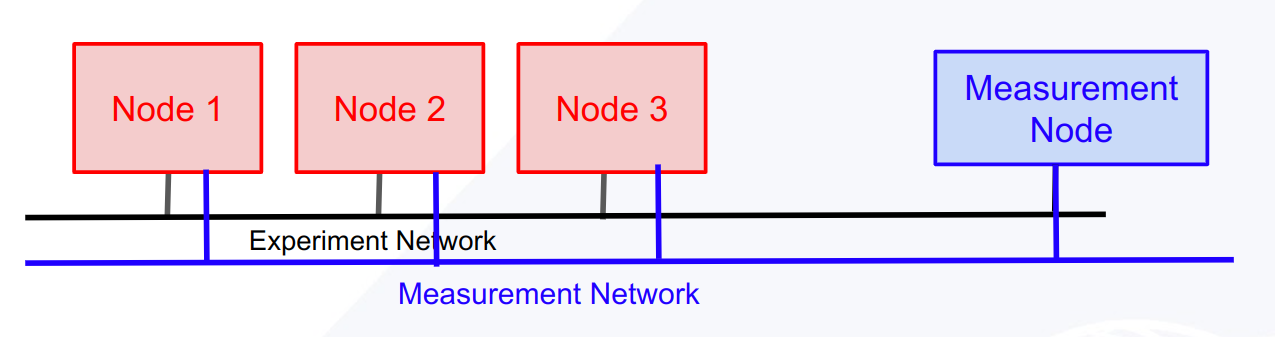

### Submit the Slice

In [ ]:
%%time
try:
    # Submit Slice Request
    print("Submitting the new slice...")
    #slice.submit()
    slice.submit(wait_timeout=1000, wait_interval=30)
    print("Slice creation done.")

except Exception as e:
    print(f"Slice Fail: {e}")
    traceback.print_exc()

-----
# Slice Setup Is Complete  
The slice has now been created with the Measurement Node and the Measurement Network. The next step is to install the Measurement Framework for use. See [Instrumentize a Slice](./instrumentize_a_slice.ipynb)  
You may also use the below methods to get general slice information or extend the slice. 

-----

# Helpers for standard slice actions.
## Helper to get slice information and login commands.

In [ ]:
from fabrictestbed_extensions.fablib.fablib import fablib

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    for node in slice.get_nodes():
        print("Node:")
        print(f"   Name              : {node.get_name()}")
        print(f"   Cores             : {node.get_cores()}")
        print(f"   RAM               : {node.get_ram()}")
        print(f"   Disk              : {node.get_disk()}")
        print(f"   Image             : {node.get_image()}")
        print(f"   Image Type        : {node.get_image_type()}")
        print(f"   Host              : {node.get_host()}")
        print(f"   Site              : {node.get_site()}")
        print(f"   Management IP     : {node.get_management_ip()}")
        print(f"   Reservation ID    : {node.get_reservation_id()}")
        print(f"   Reservation State : {node.get_reservation_state()}")
        print(f"   SSH Command       : {node.get_ssh_command()}")
        print(f"   Components        :  ")
        for component in node.get_components():
            print(f"      Name             : {component.get_name()}")
            print(f"      Details          : {component.get_details()}")
            print(f"      Disk (G)         : {component.get_disk()}")
            print(f"      Units            : {component.get_unit()}")
            print(f"      PCI Address      : {component.get_pci_addr()}")
            print(f"      Model            : {component.get_model()}")
            print(f"      Type             : {component.get_type()}") 
        print(f"   Interfaces        :  ")
        for interface in node.get_interfaces():
            print(f"       Name                : {interface.get_name()}")
            print(f"           Bandwidth           : {interface.get_bandwidth()}")
            print(f"           VLAN                : {interface.get_vlan()}")  
            print(f"           MAC                 : {interface.get_mac()}") 
            print(f"           OS iface name       : {interface.get_os_interface()}")
    for network in slice.get_l2networks():
        print("Network:")
        print(f"    Name:            {network.get_name()}")
    #print(f"Interface Map: {slice.get_interface_map()}")
except Exception as e:
    print(f"Fail: {e}")
    traceback.print_exc()

## Check/extend slice life.

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    print(f"Lease End         : {slice.get_lease_end()}")
       
except Exception as e:
    print(f"Exception: {e}")

In [ ]:
import datetime

#Extend slice
end_date = (datetime.datetime.now().astimezone() + datetime.timedelta(days=6)).strftime("%Y-%m-%d %H:%M:%S %z")

try:
    slice = fablib.get_slice(name=slice_name)
    slice.renew(end_date)
except Exception as e:
    print(f"Exception: {e}")

## Delete Slice

If you plan to go to other notebooks that use an instrumentized slice then keep the slice up. 
Otherwise you can uncomment out the next section to delete the slice.

In [ ]:
# try:
#     slice = fablib.get_slice(name=slice_name)
#     slice.delete()
# except Exception as e:
#     print(f"Fail: {e}")
#     traceback.print_exc()